In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from dynadojo.systems import LorenzSystem
from dynadojo.utils.lds import plot
from dynadojo.baselines import SINDy
import numpy as np

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

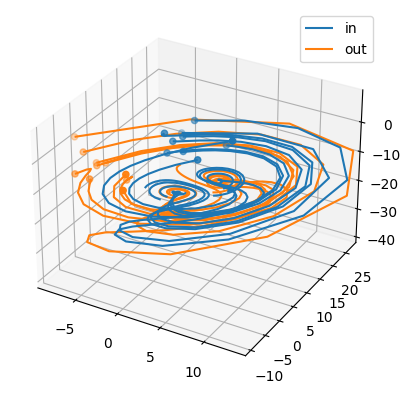

In [5]:
latent_dim = 3
embed_dim = latent_dim
n = 50
test_size = 10
timesteps = 50
system = LorenzSystem(latent_dim, embed_dim, noise_scale=0)
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(30, in_dist=False)
x = system.make_data(x0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
y = system.make_data(y0, control=np.zeros((test_size, timesteps, embed_dim)), timesteps=timesteps, noisy=True)
plot([x, y], target_dim=min(latent_dim, 3), labels=["in", "out"], max_lines=test_size)

y_err=1.6685085197829332


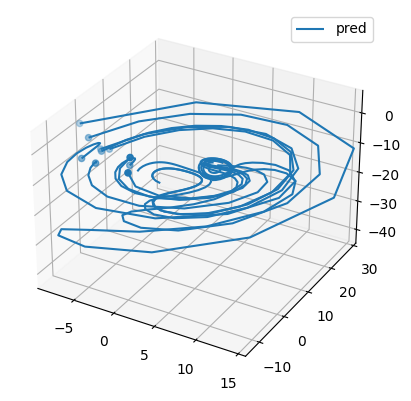

In [6]:
sindy = SINDy(embed_dim, timesteps, max_control_cost=0)
sindy.fit(x)
y_pred = sindy.predict(y[:, 0], timesteps)
plot([y_pred], target_dim=min(3, latent_dim), labels=["pred"], max_lines=15)
y_err = system.calc_error(y, y_pred)
print(f"{y_err=}")